In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [29]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Importing the dataset
movies_clean_df = pd.read_csv('movies_clean.csv', delimiter = ',', quotechar='"')
movies_clean_df.head()

,title,release_date,genres,overview,first_genre,overview_stem,overview_lem
0,Toy Story,1995-10-30,Animation|Comedy|Family,"Led by Woody, Andy's toys live happily in his ...",Animation,led woodi andi toy live happili room andi birt...,Led Woody Andy toy live happily room Andy birt...
1,Jumanji,1995-12-15,Adventure|Fantasy|Family,When siblings Judy and Peter discover an encha...,Adventure,when sibl judi peter discov enchant board game...,When sibling Judy Peter discover enchant board...
2,Waiting to Exhale,1995-12-22,Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...",Comedy,cheat mistreat step women hold breath wait elu...,Cheated mistreat step woman hold breath wait e...
3,Father of the Bride Part II,1995-02-10,Comedy,Just when George Banks has recovered from his ...,Comedy,just georg bank recov daughter wed receiv news...,Just George Banks recover daughter wedding rec...
4,Heat,1995-12-15,Action|Crime|Drama|Thriller,"Obsessive master thief, Neil McCauley leads a ...",Action,obsess master thief neil mccauley lead top-not...,Obsessive master thief Neil McCauley lead top-...


In [31]:
def get_unique_genres(df, column='first_genre'):
  genres = set()
  for line in df[column]:
    if column == 'genre':
      genres.update(line.split('|'))
    else:
      genres.add(line)
  return sorted(genres)

# Get class labels
classes = get_unique_genres(movies_clean_df)
print(classes)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller']


In [32]:
# # Splitting dataframes into train and test
# train_movies_df, test_movies_df = train_test_split(movies_clean_df, test_size=0.2)

# # Splitting dataframes into X and y
# X_train_stem = train_movies_df['overview_stem']
# X_train_lem = train_movies_df['overview_lem']
# y_train = train_movies_df['first_genre']
# # y_train = train_movies_df['genres']
# X_test_stem = test_movies_df['overview_stem']
# X_test_lem = test_movies_df['overview_lem']
# y_test = test_movies_df['first_genre']
# # y_test = test_movies_df['genres']

In [33]:
# Splitting dataframes into X and y
X_stem = movies_clean_df['overview_stem']
X_lem = movies_clean_df['overview_lem']
y = movies_clean_df['first_genre']
# y_train = train_movies_df['genres']

In [34]:
# Vectorizing the data
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_stem_tf = vectorizer.fit_transform(X_stem)
X_lem_tf = vectorizer.fit_transform(X_lem)

In [35]:
print("X_stem_tf ", X_stem_tf.shape)
print("X_lem_tf ", X_lem_tf.shape)

X_stem_tf  (10000, 254248)
X_lem_tf  (10000, 260847)


In [36]:
# Splitting dataframes into train and test
X_train_stem, X_test_stem, X_train_lem, X_test_lem, y_train, y_test = train_test_split(X_stem_tf, X_lem_tf, y, test_size=0.2, random_state=42)

print("X_train_stem shape:", X_train_stem.shape)
print("X_test_stem shape:", X_test_stem.shape)
print("X_train_lem shape:", X_train_lem.shape)
print("X_test_lem shape:", X_test_lem.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_stem shape: (8000, 254248)
X_test_stem shape: (2000, 254248)
X_train_lem shape: (8000, 260847)
X_test_lem shape: (2000, 260847)
y_train shape: (8000,)
y_test shape: (2000,)


In [37]:
# Building the model and predicting the results
def models_fit_predict(X_train, y_train, X_test):
  
  # Create the model logistic regression
  print("LogisticRegression train started...")
  LR_model = LogisticRegression(max_iter=1000, n_jobs=6)
  LR_model.fit(X_train, y_train)
  print("LogisticRegression train ended...")
  
  # Create the model SVC
  print("SVC train started...")
  SVC_model = svm.SVC()
  SVC_model.fit(X_train, y_train)
  print("SVC train ended...")
  
  # Create the model NuSVC
  print("NuSVC train started...")
  NuSVC_model = svm.NuSVC()
  NuSVC_model.fit(X_train, y_train)
  print("NuSVC train ended...")
  
  # Create the model multi-layer perceptron
  # print("MLPClassifier train started...")
  # MLP_model = MLPClassifier(hidden_layer_sizes=(5, 5, 5), random_state=0, max_iter=100)
  # MLP_model.fit(X_train, y_train)
  # print("MLPClassifier train ended...")
  
  # Predicting the Test set results
  print("Predicting start...")
  y_pred_LR = LR_model.predict(X_test)
  y_pred_SVC = SVC_model.predict(X_test)
  y_pred_NuSVC = NuSVC_model.predict(X_test)
  # y_pred_MLP = MLP_model.predict(X_test)
  print("Predicting ended...")
  
  # Build the dictionary with the models results
  models = {
    'Logistic Regression': y_pred_LR,
    'SVC': y_pred_SVC,
    'NuSVC': y_pred_NuSVC,
    # 'MLP': y_pred_MLP
  }
  
  return models
  

In [60]:
def plot_confusion_matrix(y_test, y_pred, model_name, classes):
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='true')
  vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
  # Set the size of the figure
  fig, ax = plt.subplots(figsize=(14, 10))
  # Plot the normalized confusion matrix
  vis.plot(values_format=".2f", ax=ax)
  plt.title(model_name + ' Normalized Confusion Matrix')
  # Rotate x-axis labels
  plt.xticks(rotation=90)
  plt.show()

In [58]:
# Print the classification report
def plot_and_print_results(models, y_test, classes):
  for model_name, y_pred in models.items():
    print(f"========================{model_name}========================")
    print(classification_report(y_test, y_pred, labels=classes))
    print("Global scores:")
    print("- Accuracy:\t", accuracy_score(y_test, y_pred))
    print("- Precision:\t", precision_score(y_test, y_pred, average='weighted'))
    print("- Recall:\t", recall_score(y_test, y_pred, average='weighted'))
    print("- F1 Score:\t", f1_score(y_test, y_pred, average='weighted'))
    print("\n")
    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name, classes)

In [40]:
# Fit and predict the models for the stemmed data
models_stem = models_fit_predict(X_train_stem, y_train, X_test_stem)

LogisticRegression train started...


LogisticRegression train ended...
SVC train started...
SVC train ended...
NuSVC train started...
NuSVC train ended...
MLPClassifier train started...


C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier train ended...
Predicting start...
Predicting ended...


========================Logistic Regression========================
              precision    recall  f1-score   support

      Action       0.38      0.29      0.33       214
   Adventure       0.44      0.56      0.49       182
   Animation       0.68      0.56      0.61       203
      Comedy       0.36      0.41      0.39       191
       Crime       0.40      0.47      0.43       189
 Documentary       0.77      0.79      0.78       233
       Drama       0.35      0.21      0.27       219
      Horror       0.47      0.63      0.54       187
     Romance       0.44      0.46      0.45       210
    Thriller       0.27      0.23      0.25       172

    accuracy                           0.47      2000
   macro avg       0.45      0.46      0.45      2000
weighted avg       0.46      0.47      0.46      2000

Global scores:
- Accuracy:	 0.465
- Precision:	 0.46226539009718354
- Recall:	 0.465
- F1 Score:	 0.45813777582848003




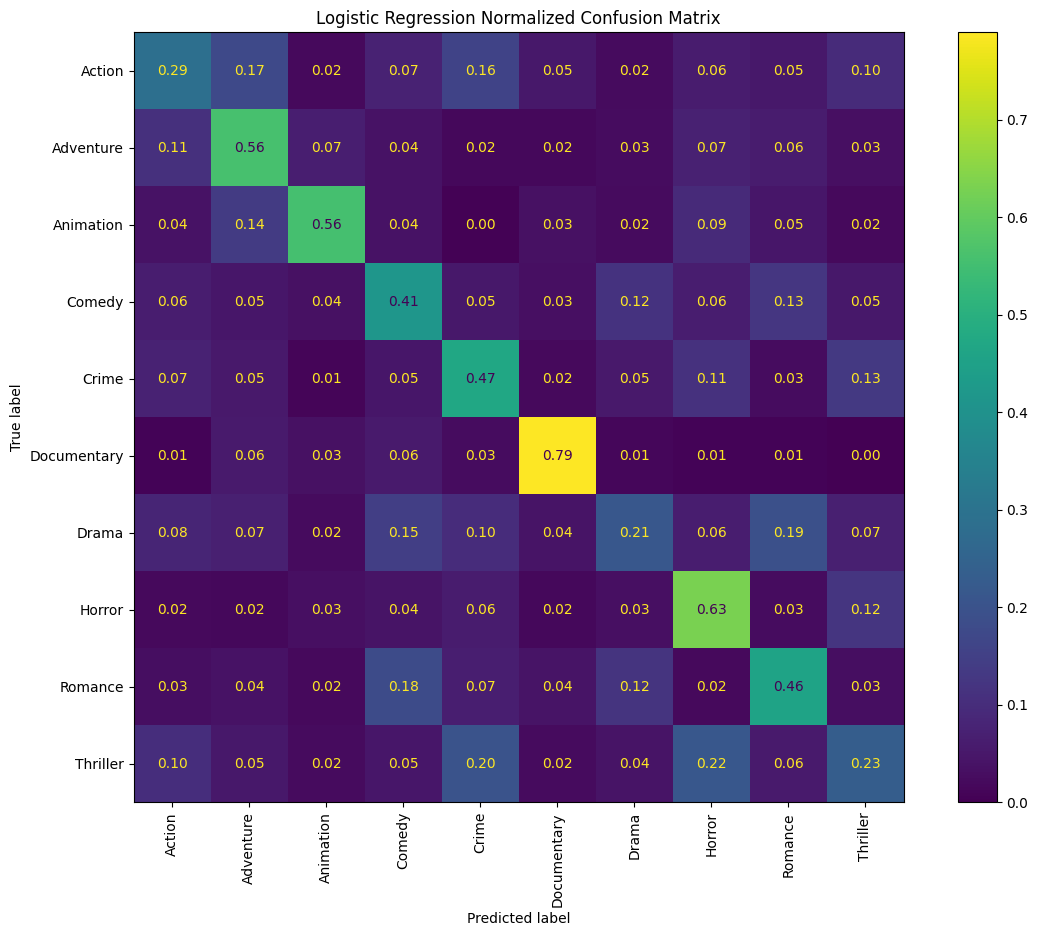

========================SVC========================
              precision    recall  f1-score   support

      Action       0.42      0.26      0.32       214
   Adventure       0.37      0.62      0.46       182
   Animation       0.73      0.43      0.54       203
      Comedy       0.31      0.56      0.40       191
       Crime       0.38      0.40      0.39       189
 Documentary       0.84      0.65      0.73       233
       Drama       0.33      0.18      0.23       219
      Horror       0.51      0.50      0.51       187
     Romance       0.49      0.41      0.45       210
    Thriller       0.24      0.33      0.28       172

    accuracy                           0.43      2000
   macro avg       0.46      0.43      0.43      2000
weighted avg       0.47      0.43      0.44      2000

Global scores:
- Accuracy:	 0.4335
- Precision:	 0.4714896437411786
- Recall:	 0.4335
- F1 Score:	 0.4353832977649445




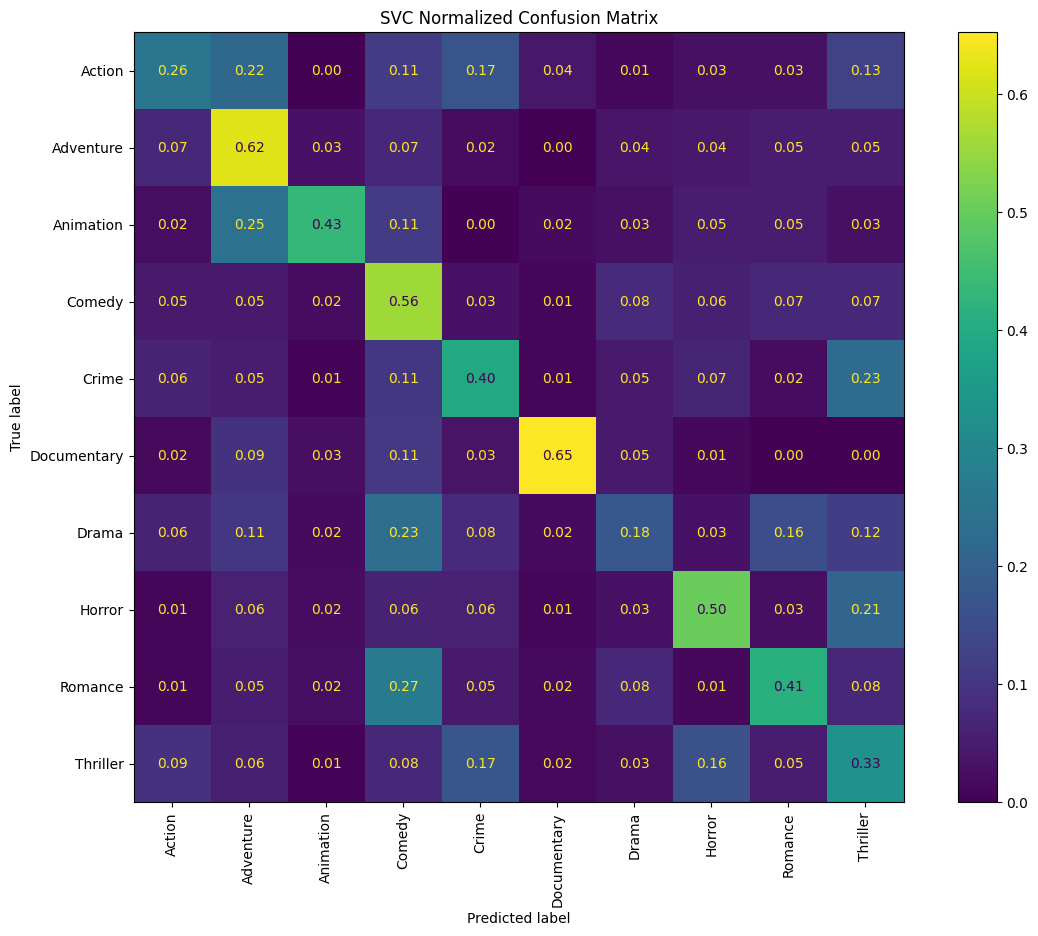

========================NuSVC========================
              precision    recall  f1-score   support

      Action       0.39      0.32      0.35       214
   Adventure       0.41      0.56      0.48       182
   Animation       0.72      0.52      0.60       203
      Comedy       0.35      0.46      0.40       191
       Crime       0.40      0.46      0.43       189
 Documentary       0.84      0.69      0.76       233
       Drama       0.31      0.25      0.28       219
      Horror       0.50      0.56      0.53       187
     Romance       0.45      0.43      0.44       210
    Thriller       0.26      0.28      0.27       172

    accuracy                           0.45      2000
   macro avg       0.46      0.45      0.45      2000
weighted avg       0.47      0.45      0.46      2000

Global scores:
- Accuracy:	 0.4545
- Precision:	 0.47188729179473393
- Recall:	 0.4545
- F1 Score:	 0.45784706333084063




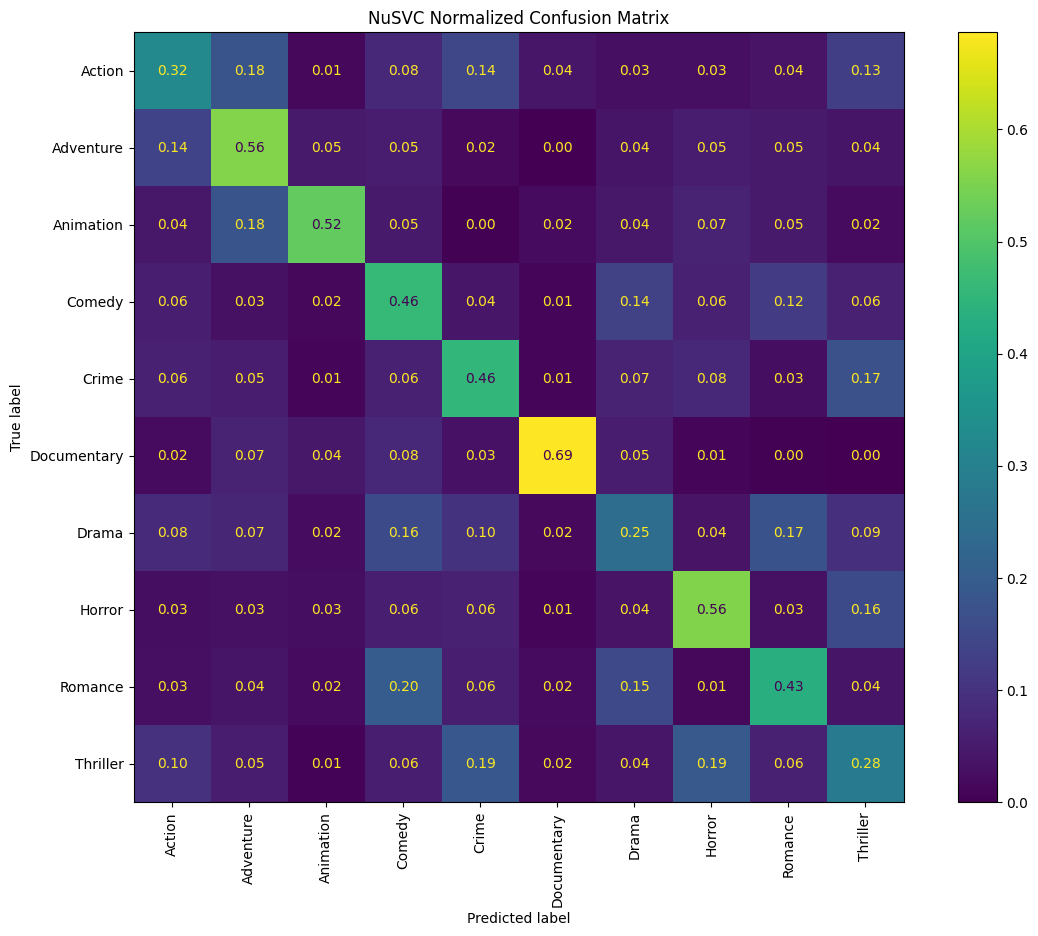

========================MLP========================
              precision    recall  f1-score   support

      Action       0.15      0.03      0.05       214
   Adventure       0.18      0.36      0.24       182
   Animation       0.50      0.00      0.01       203
      Comedy       0.12      0.21      0.16       191
       Crime       0.00      0.00      0.00       189
 Documentary       0.47      0.03      0.06       233
       Drama       1.00      0.00      0.01       219
      Horror       0.11      0.36      0.17       187
     Romance       0.33      0.00      0.01       210
    Thriller       0.10      0.40      0.17       172

    accuracy                           0.13      2000
   macro avg       0.30      0.14      0.09      2000
weighted avg       0.31      0.13      0.08      2000

Global scores:
- Accuracy:	 0.129
- Precision:	 0.31446516186142154
- Recall:	 0.129
- F1 Score:	 0.08260460491527107




C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

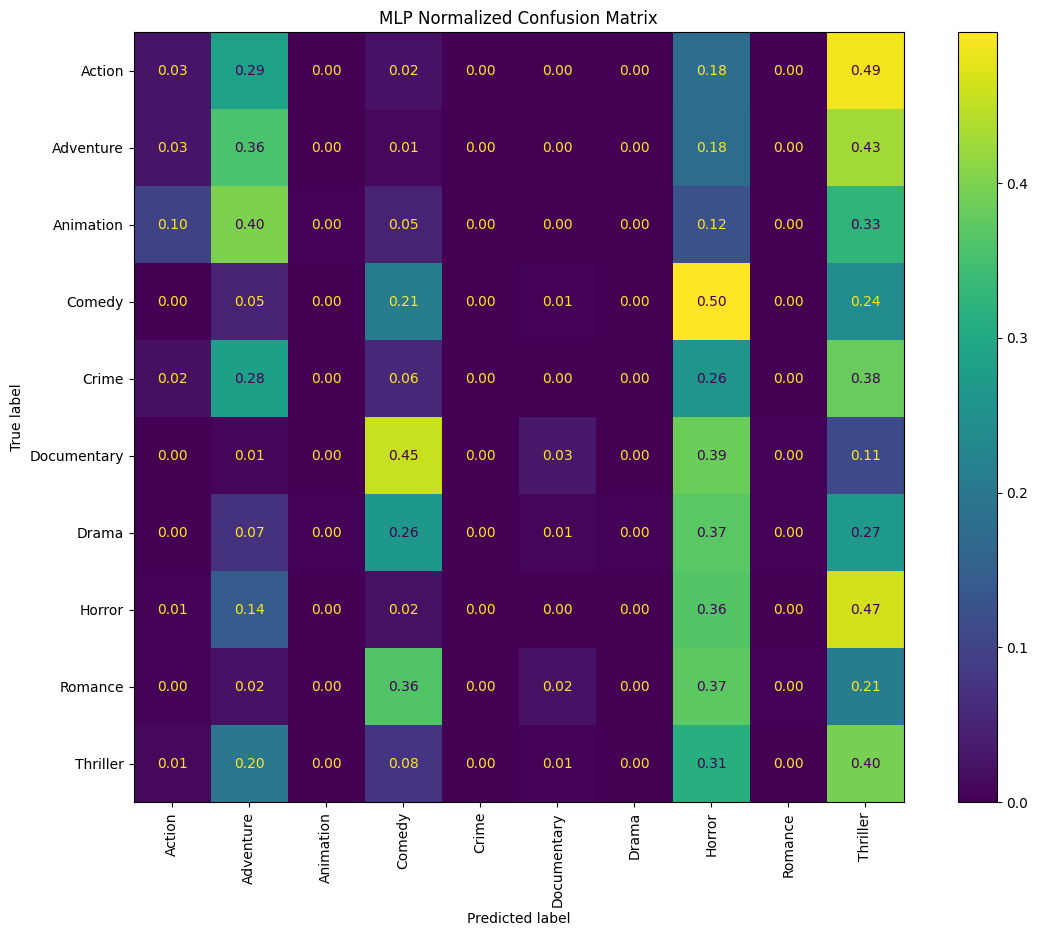

In [61]:
# Print the results
plot_and_print_results(models_stem, y_test, classes)

In [62]:
# Fit and predict the models for the lemmatized data
models_lem = models_fit_predict(X_train_lem, y_train, X_test_lem)

LogisticRegression train started...
LogisticRegression train ended...
SVC train started...
SVC train ended...
NuSVC train started...
NuSVC train ended...
MLPClassifier train started...


C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier train ended...
Predicting start...
Predicting ended...


========================Logistic Regression========================
              precision    recall  f1-score   support

      Action       0.40      0.29      0.34       214
   Adventure       0.42      0.54      0.47       182
   Animation       0.61      0.52      0.56       203
      Comedy       0.34      0.37      0.35       191
       Crime       0.41      0.48      0.44       189
 Documentary       0.77      0.76      0.76       233
       Drama       0.35      0.23      0.28       219
      Horror       0.47      0.63      0.54       187
     Romance       0.42      0.47      0.45       210
    Thriller       0.27      0.23      0.25       172

    accuracy                           0.46      2000
   macro avg       0.45      0.45      0.44      2000
weighted avg       0.45      0.46      0.45      2000

Global scores:
- Accuracy:	 0.4555
- Precision:	 0.45373533375009517
- Recall:	 0.4555
- F1 Score:	 0.4494434719144217




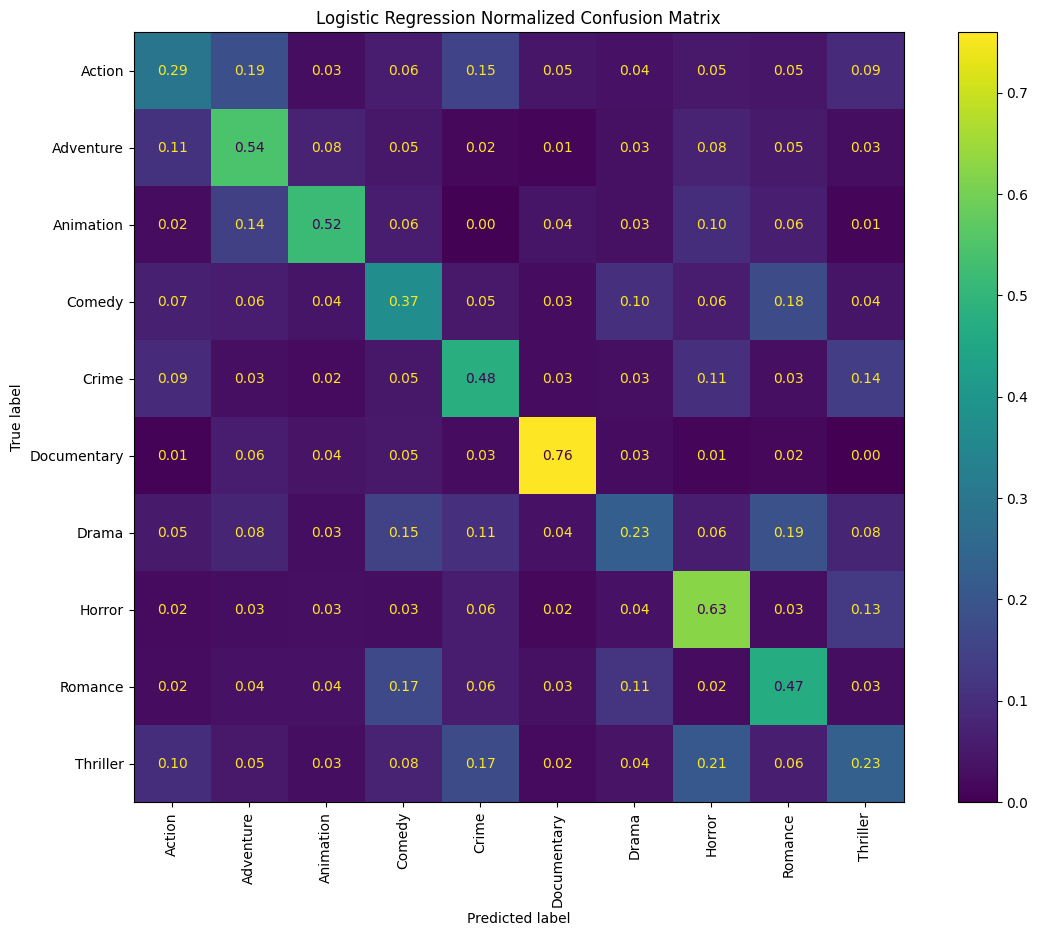

========================SVC========================
              precision    recall  f1-score   support

      Action       0.46      0.25      0.32       214
   Adventure       0.35      0.60      0.44       182
   Animation       0.69      0.45      0.55       203
      Comedy       0.29      0.52      0.37       191
       Crime       0.39      0.40      0.40       189
 Documentary       0.85      0.63      0.72       233
       Drama       0.34      0.18      0.23       219
      Horror       0.51      0.48      0.49       187
     Romance       0.46      0.37      0.41       210
    Thriller       0.18      0.28      0.22       172

    accuracy                           0.42      2000
   macro avg       0.45      0.42      0.42      2000
weighted avg       0.46      0.42      0.42      2000

Global scores:
- Accuracy:	 0.416
- Precision:	 0.46329298762773924
- Recall:	 0.416
- F1 Score:	 0.42119778164404725




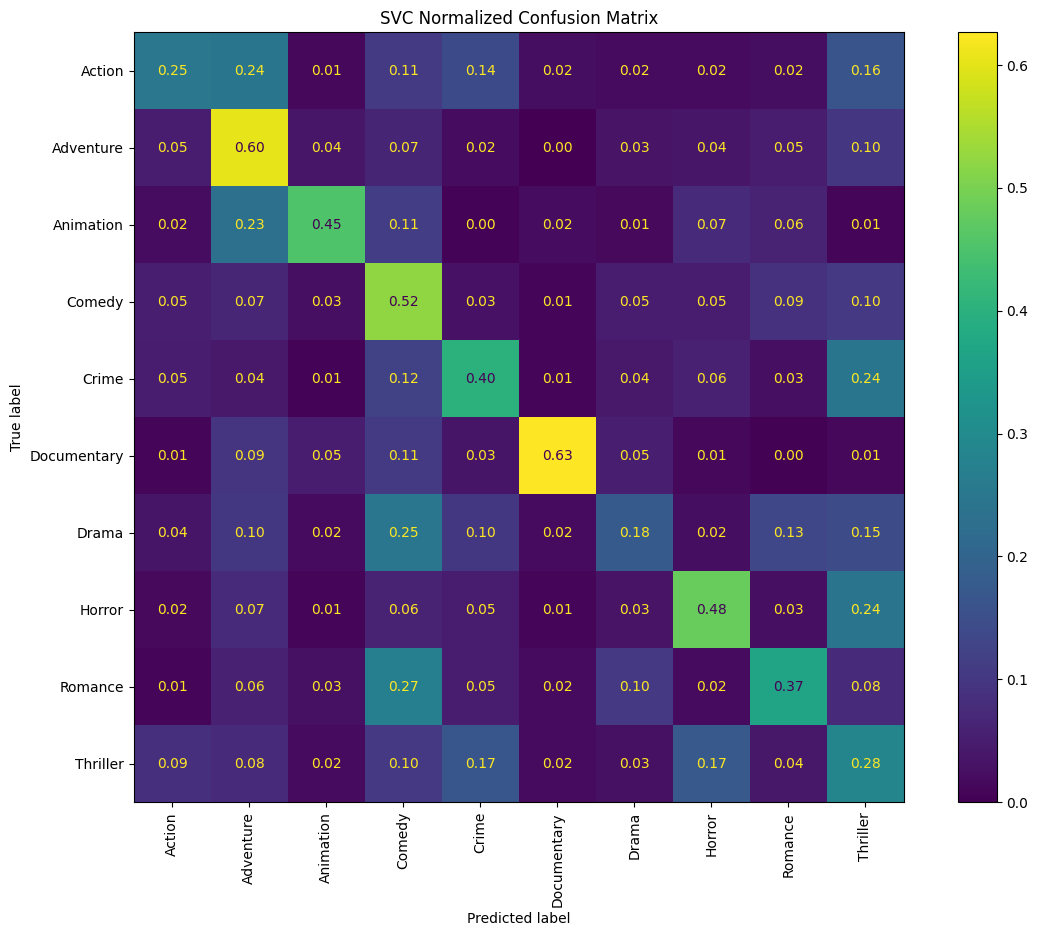

========================NuSVC========================
              precision    recall  f1-score   support

      Action       0.40      0.31      0.35       214
   Adventure       0.40      0.55      0.47       182
   Animation       0.67      0.51      0.58       203
      Comedy       0.32      0.42      0.37       191
       Crime       0.40      0.46      0.43       189
 Documentary       0.85      0.68      0.76       233
       Drama       0.33      0.26      0.29       219
      Horror       0.50      0.53      0.52       187
     Romance       0.43      0.42      0.43       210
    Thriller       0.24      0.27      0.25       172

    accuracy                           0.45      2000
   macro avg       0.45      0.44      0.44      2000
weighted avg       0.46      0.45      0.45      2000

Global scores:
- Accuracy:	 0.445
- Precision:	 0.46406542879589674
- Recall:	 0.445
- F1 Score:	 0.4491621918855039




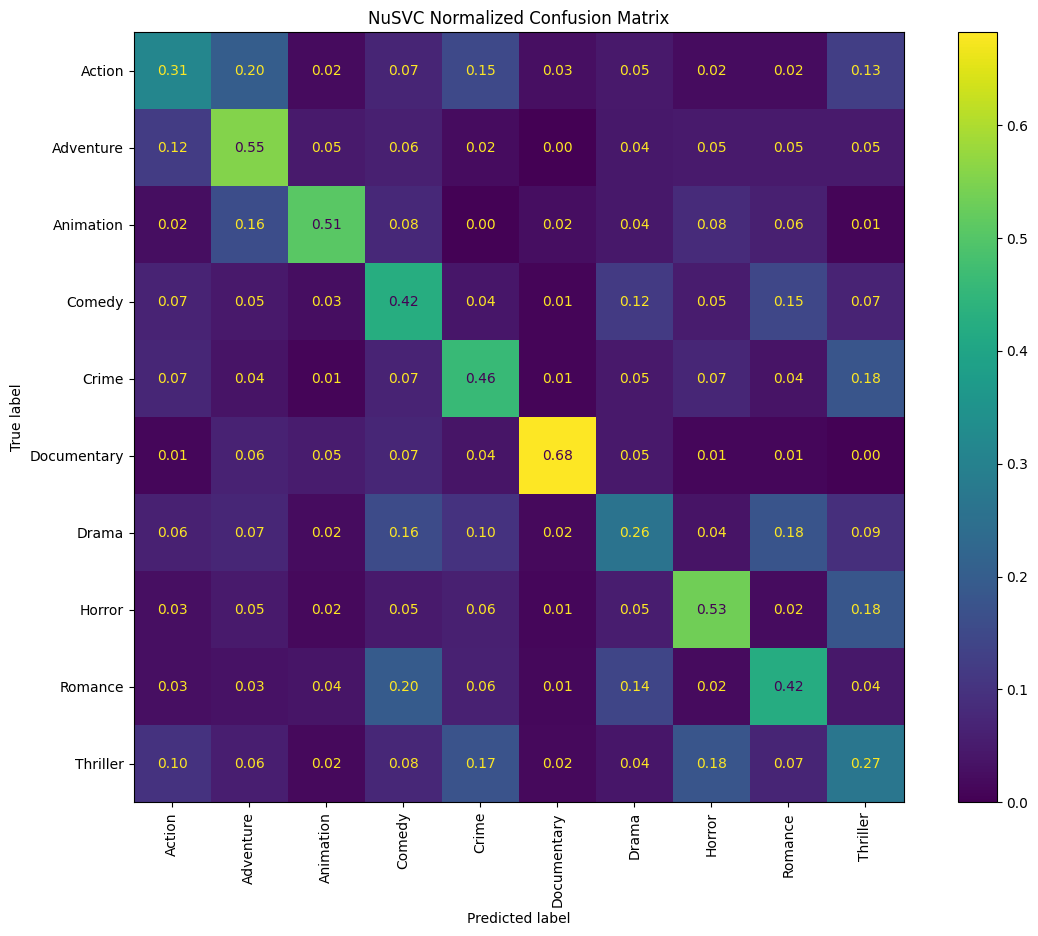

========================MLP========================
              precision    recall  f1-score   support

      Action       0.07      0.14      0.10       214
   Adventure       0.11      0.62      0.19       182
   Animation       0.11      0.01      0.03       203
      Comedy       0.00      0.00      0.00       191
       Crime       0.00      0.00      0.00       189
 Documentary       0.00      0.00      0.00       233
       Drama       0.00      0.00      0.00       219
      Horror       0.12      0.07      0.09       187
     Romance       0.00      0.00      0.00       210
    Thriller       0.07      0.17      0.10       172

    accuracy                           0.09      2000
   macro avg       0.05      0.10      0.05      2000
weighted avg       0.05      0.09      0.05      2000

Global scores:
- Accuracy:	 0.0945
- Precision:	 0.046121059311442524
- Recall:	 0.0945
- F1 Score:	 0.04678652181926321




C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

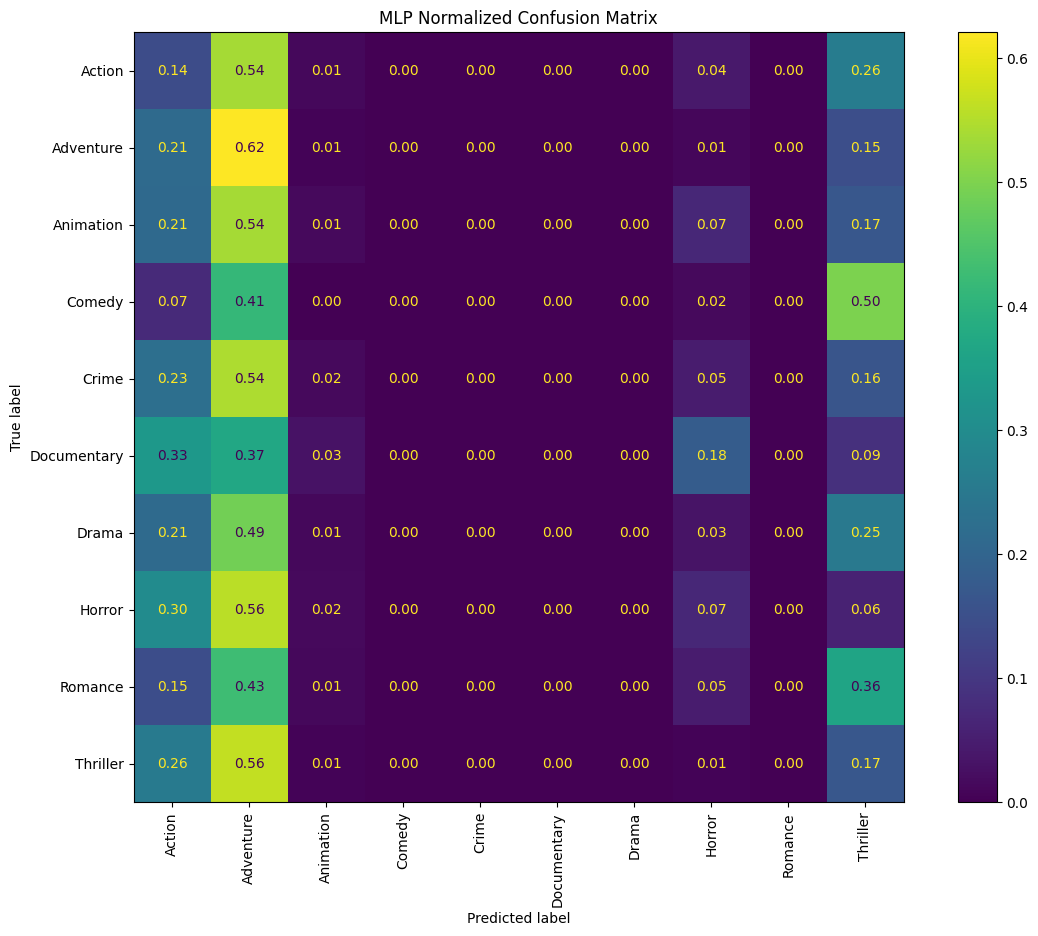

In [63]:
# Print the results
plot_and_print_results(models_lem, y_test, classes)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Convertir les genres en labels numériques
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y_train)
print(y_numeric)

# Take the first two features. We could avoid this by using a two-dim dataset
X = X_train_tf[:, :2].toarray()
y = y_numeric

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

[9 9 3 ... 4 4 1]


NameError: name 'X_train_tf' is not defined

# TEST


In [ ]:
# Liste to stock model by genre
models_by_genre = {}

for genre in classes:
  y_train_genre = y_train.str.contains(genre).astype(int)
  # Create Model
  model = LogisticRegression(max_iter=1000, n_jobs=6)
  # train model on train data
  model.fit(X_train_tf, y_train_genre)
  # Stock model in list
  models_by_genre[genre] = model

In [ ]:
# prediction for each genre
predictions_by_genre = {}

for genre, model in models_by_genre.items():
    # Predict actual genre
    predictions = model.predict(X_test_tf)
    predictions_by_genre[genre] = predictions

In [ ]:
# Evaluation
accuracy_by_genre = {}

for genre, predictions in predictions_by_genre.items():
    # Extract real for actual genre
    y_test_genre = y_test.str.contains(genre).astype(int)

    # get Accuracy
    accuracy = accuracy_score(y_test_genre, predictions)
    accuracy_by_genre[genre] = accuracy
    print(f"=================== {genre} ===================")
    print(f"Accuracy : {accuracy}")
    print(f"F1 score : {f1_score(y_test_genre, predictions)}")
    print(f"Recall score : {recall_score(y_test_genre, predictions)}")
    print(f"Precision score : {precision_score(y_test_genre, predictions)}")

=================== Action ===================
Accuracy : 0.9188405797101449
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Adventure ===================
Accuracy : 0.9173913043478261
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Animation ===================
Accuracy : 0.9195652173913044
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Comedy ===================
Accuracy : 0.9094202898550725
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Crime ===================
Accuracy : 0.9202898550724637
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
=================== Documentary ===================
Accuracy : 0.9355072463768116
F1 score : 0.2879999999999999
Recall score : 0.16981132075471697
Precision score : 0.9473684210526315
=================== Drama ===================
Accuracy : 0.9130434782608695
F1 score : 0.0
Recall score : 0.0
Precision score : 0.0
==============

C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\louis\AppData\Roaming\Python\Python311\site-packages